In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
import scipy
from scipy import stats
from scipy.stats import skewnorm
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set(color_codes=True)

In [2]:
df = pd.read_csv('ProductsData.csv', encoding='latin1')
df.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
0,"""chambre a coucher ""","""40008817""","""Meubles et décoration """,1 800,"""private""","""Grand Casablanca""","""Casablanca"""
1,"""Comte free fire""","""40008816""","""Jeux vidéo et consoles """,,"""private""","""Grand Casablanca""","""Casablanca"""
2,"""Iphone 6 plus""","""40008815""","""Téléphones """,,"""private""","""Grand Casablanca""","""Casablanca"""
3,"""Renault ""","""40008814""","""Voitures """,,"""private""","""Chaouia-Ouardigha""","""Settat"""
4,"""PS3 SLIM 360 GB ""","""40008812""","""Jeux vidéo et consoles """,1 400,"""private""","""Rabat-Salé-Zemmour-Zaër""","""Sala Al-Jadida"""


In [3]:
df.describe()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
count,4350,4350,4350,3580,4350,4350,4350
unique,3407,3739,45,529,2,16,124
top,"""Renault""","""39235089""","""Voitures """,,"""private""","""Grand Casablanca""","""Casablanca"""
freq,18,3,654,451,2688,1355,1272


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4350 entries, 0 to 4349
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Product_name              4350 non-null   object
 1   Product_id                4350 non-null   object
 2   Product_Category          4350 non-null   object
 3   price                     3580 non-null   object
 4   Professional_Publication  4350 non-null   object
 5   Region_address            4350 non-null   object
 6   Local_address             4350 non-null   object
dtypes: object(7)
memory usage: 238.0+ KB


In [5]:
df.isnull().sum()

Product_name                  0
Product_id                    0
Product_Category              0
price                       770
Professional_Publication      0
Region_address                0
Local_address                 0
dtype: int64

# Data Cleaning

In [6]:
#Removing "" from all the elements.

for i,col in enumerate(df.columns):
    df.iloc[:,i]=df.iloc[:,i].str.replace('"','')
df.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
0,chambre a coucher,40008817,Meubles et décoration,1 800,private,Grand Casablanca,Casablanca
1,Comte free fire,40008816,Jeux vidéo et consoles,,private,Grand Casablanca,Casablanca
2,Iphone 6 plus,40008815,Téléphones,,private,Grand Casablanca,Casablanca
3,Renault,40008814,Voitures,,private,Chaouia-Ouardigha,Settat
4,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1 400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida


In [7]:
#Replace all the null values in string with NaN.

df = df.replace(r'^\s*$', np.nan, regex=True)
df.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
0,chambre a coucher,40008817,Meubles et décoration,1 800,private,Grand Casablanca,Casablanca
1,Comte free fire,40008816,Jeux vidéo et consoles,NaN,private,Grand Casablanca,Casablanca
2,Iphone 6 plus,40008815,Téléphones,NaN,private,Grand Casablanca,Casablanca
3,Renault,40008814,Voitures,NaN,private,Chaouia-Ouardigha,Settat
4,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1 400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida


In [8]:
#Replace unwanted strings with NaN.

df['Product_name'] = df['Product_name'].apply(lambda x: np.nan if str(x).find('?')>-1 else x)
df.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
0,chambre a coucher,40008817,Meubles et décoration,1 800,private,Grand Casablanca,Casablanca
1,Comte free fire,40008816,Jeux vidéo et consoles,NaN,private,Grand Casablanca,Casablanca
2,Iphone 6 plus,40008815,Téléphones,NaN,private,Grand Casablanca,Casablanca
3,Renault,40008814,Voitures,NaN,private,Chaouia-Ouardigha,Settat
4,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1 400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida


In [9]:
#Removing all unwanted spaces from price column.

df['price'] = df['price'].str.replace(' ', '')
df.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
0,chambre a coucher,40008817,Meubles et décoration,1800,private,Grand Casablanca,Casablanca
1,Comte free fire,40008816,Jeux vidéo et consoles,NaN,private,Grand Casablanca,Casablanca
2,Iphone 6 plus,40008815,Téléphones,NaN,private,Grand Casablanca,Casablanca
3,Renault,40008814,Voitures,NaN,private,Chaouia-Ouardigha,Settat
4,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida


In [10]:
#Removing null values from Product_Name.

i = df['Product_name'].isnull()
data = df[i]
data.shape

(380, 7)

In [11]:
df = df.drop(data.index,axis=0)
df.shape

(3970, 7)

# Separating Test Data

In [12]:
#Missing values in Price column can be used as a test dataset to evaluate the model.

test_data = df[df.isnull().any(axis=1)]
test_data.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
1,Comte free fire,40008816,Jeux vidéo et consoles,NaN,private,Grand Casablanca,Casablanca
2,Iphone 6 plus,40008815,Téléphones,NaN,private,Grand Casablanca,Casablanca
3,Renault,40008814,Voitures,NaN,private,Chaouia-Ouardigha,Settat
6,becane,40008811,Motos,NaN,private,Fès-Boulemane,Fès
9,Appartement,40008807,Appartements,NaN,private,Grand Casablanca,Casablanca


In [13]:
test_data.index=range(1,len(test_data)+1)
test_data=test_data.drop('price',axis=1)
test_data.head()

,Product_name,Product_id,Product_Category,Professional_Publication,Region_address,Local_address
1,Comte free fire,40008816,Jeux vidéo et consoles,private,Grand Casablanca,Casablanca
2,Iphone 6 plus,40008815,Téléphones,private,Grand Casablanca,Casablanca
3,Renault,40008814,Voitures,private,Chaouia-Ouardigha,Settat
4,becane,40008811,Motos,private,Fès-Boulemane,Fès
5,Appartement,40008807,Appartements,private,Grand Casablanca,Casablanca


In [14]:
data=test_data.drop_duplicates(subset=None,keep='first',inplace=False)
print('Shape of Original dataset:',test_data.shape)
print('Shape of dataset after dropping duplicates:',data.shape)

Shape of Original dataset: (1076, 6)
Shape of dataset after dropping duplicates: (923, 6)


In [15]:
#Dropping missing values in target variable

df.dropna(axis=0, subset=['price'], inplace=True)

In [16]:
df.isnull().sum()

Product_name                0
Product_id                  0
Product_Category            0
price                       0
Professional_Publication    0
Region_address              0
Local_address               0
dtype: int64

In [17]:
df.index=range(1,len(df)+1)

In [18]:
without_duplicate_data = df.drop_duplicates(subset=None,keep='first',inplace=False)

print('Shape of Original dataset:',df.shape)
print('Shape of dataset after dropping duplicates:',without_duplicate_data.shape)

Shape of Original dataset: (2894, 7)
Shape of dataset after dropping duplicates: (2501, 7)


In [19]:
#Since, Rows in the Product dataset after dropping duplicates is less than the original Product dataset, so there exists some duplicates in the given dataset, so, we will drop those for further evaluation.¶

df = without_duplicate_data
df.shape

(2501, 7)

# Data Visualization

In [20]:
df['price']=pd.to_numeric(df['price'], errors='coerce')
df['Product_id']=pd.to_numeric(df['Product_id'], errors='coerce')

In [21]:
df = df.sort_values('price')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 85.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 93.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 68.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/o

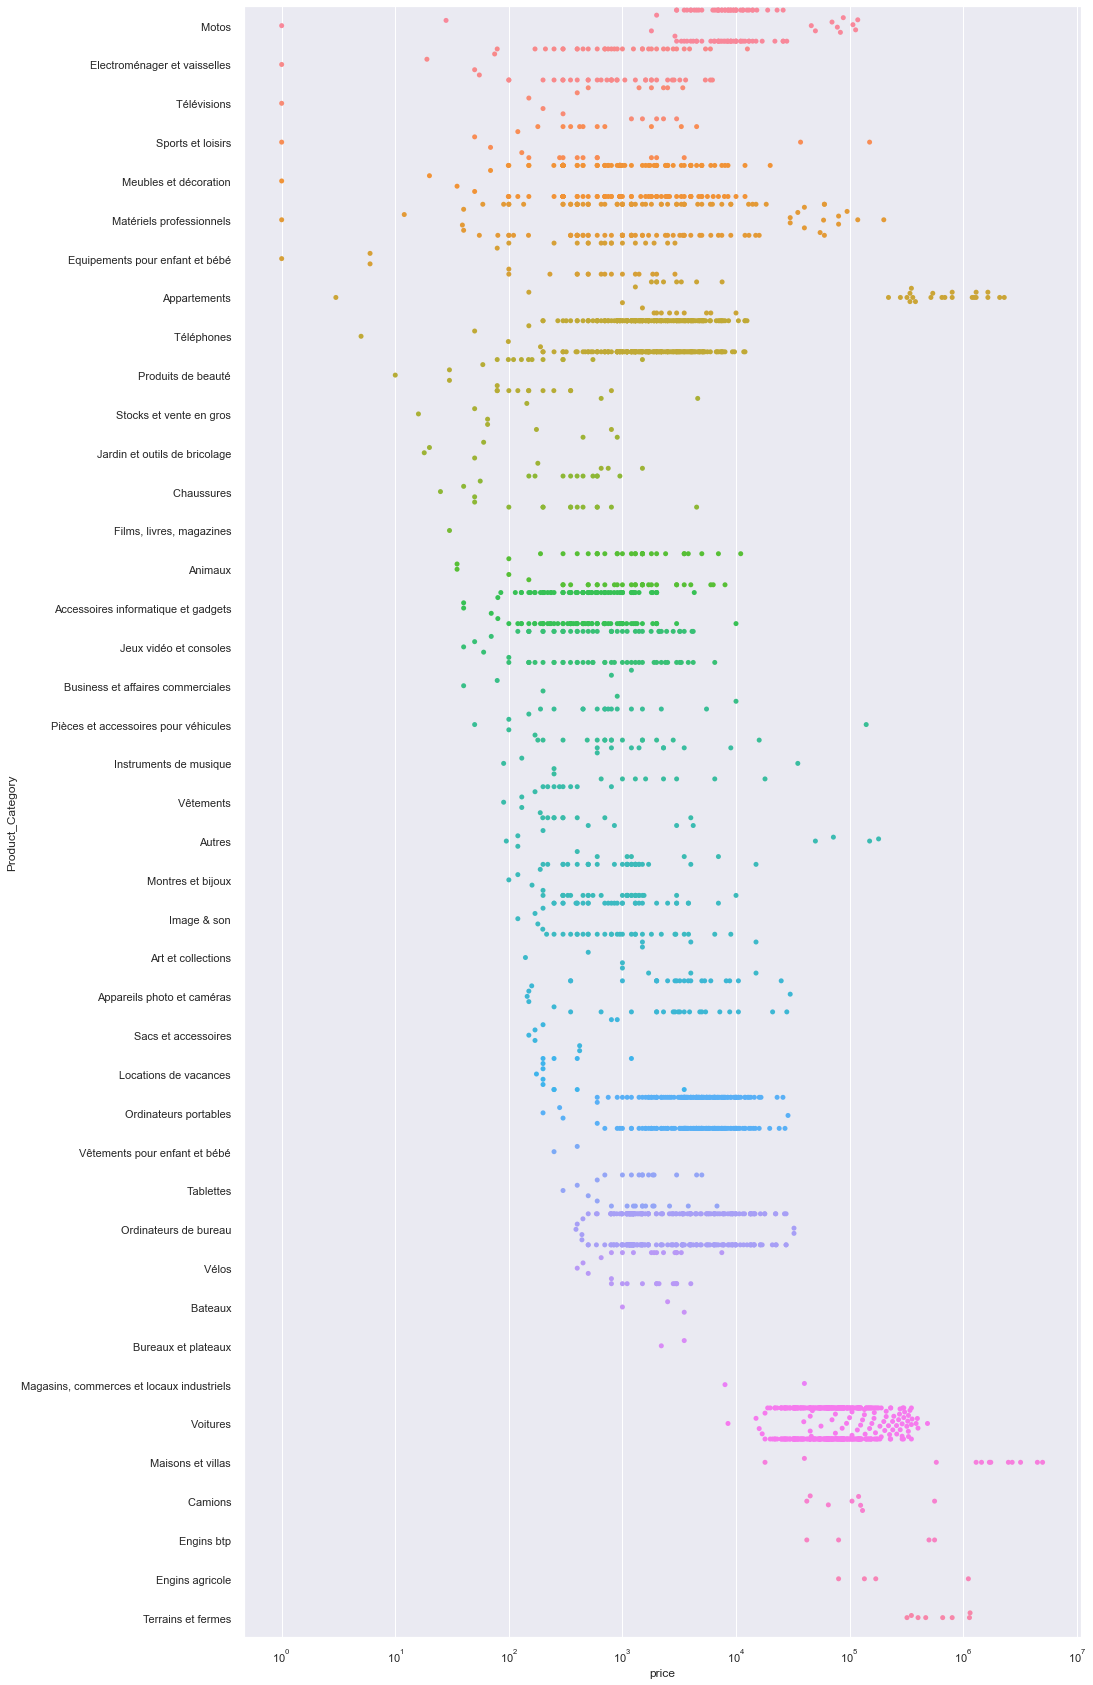

In [22]:
plt.figure(figsize=(15,30))
sns.swarmplot(df['price'],df['Product_Category'])
plt.xscale('log')

Appartements and Maisons et villas are the most expensive products category. Voitures product category seems to have the most number of expensive items. Many of the product category contains outliers due to variation in prices of the different product category.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 79.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 84.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


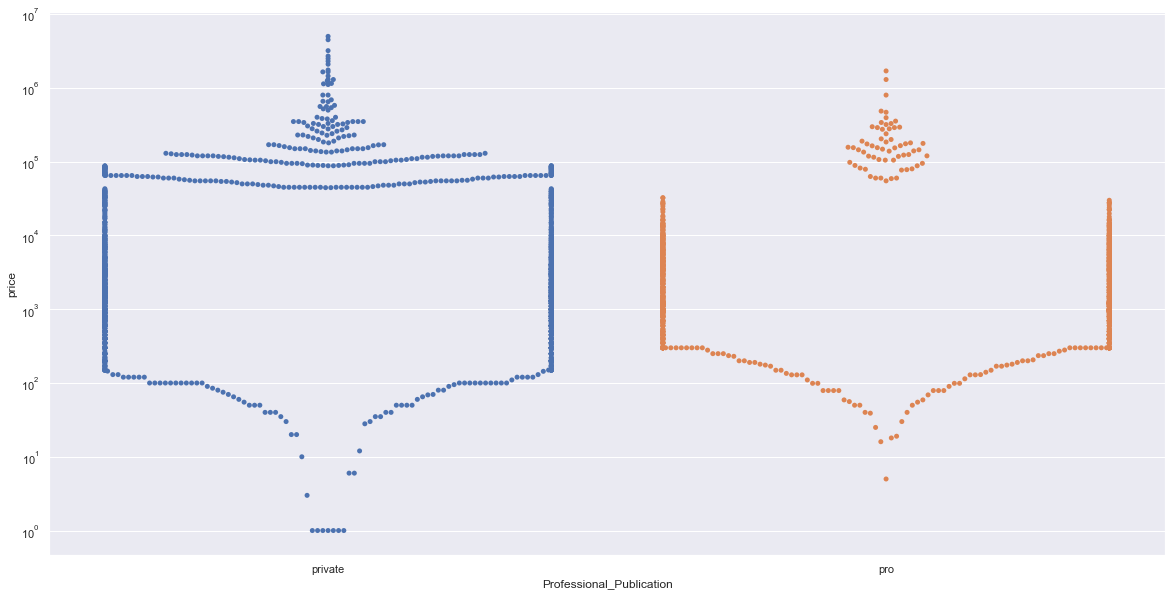

In [23]:
plt.figure(figsize=(20,10))
sns.swarmplot(df['Professional_Publication'],df['price'])
plt.yscale('log')

The private publications seems to have more data items towards the more expensive prices products and even towards the more cheap prices products and also contains more number of outliers than that of pro publications product.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


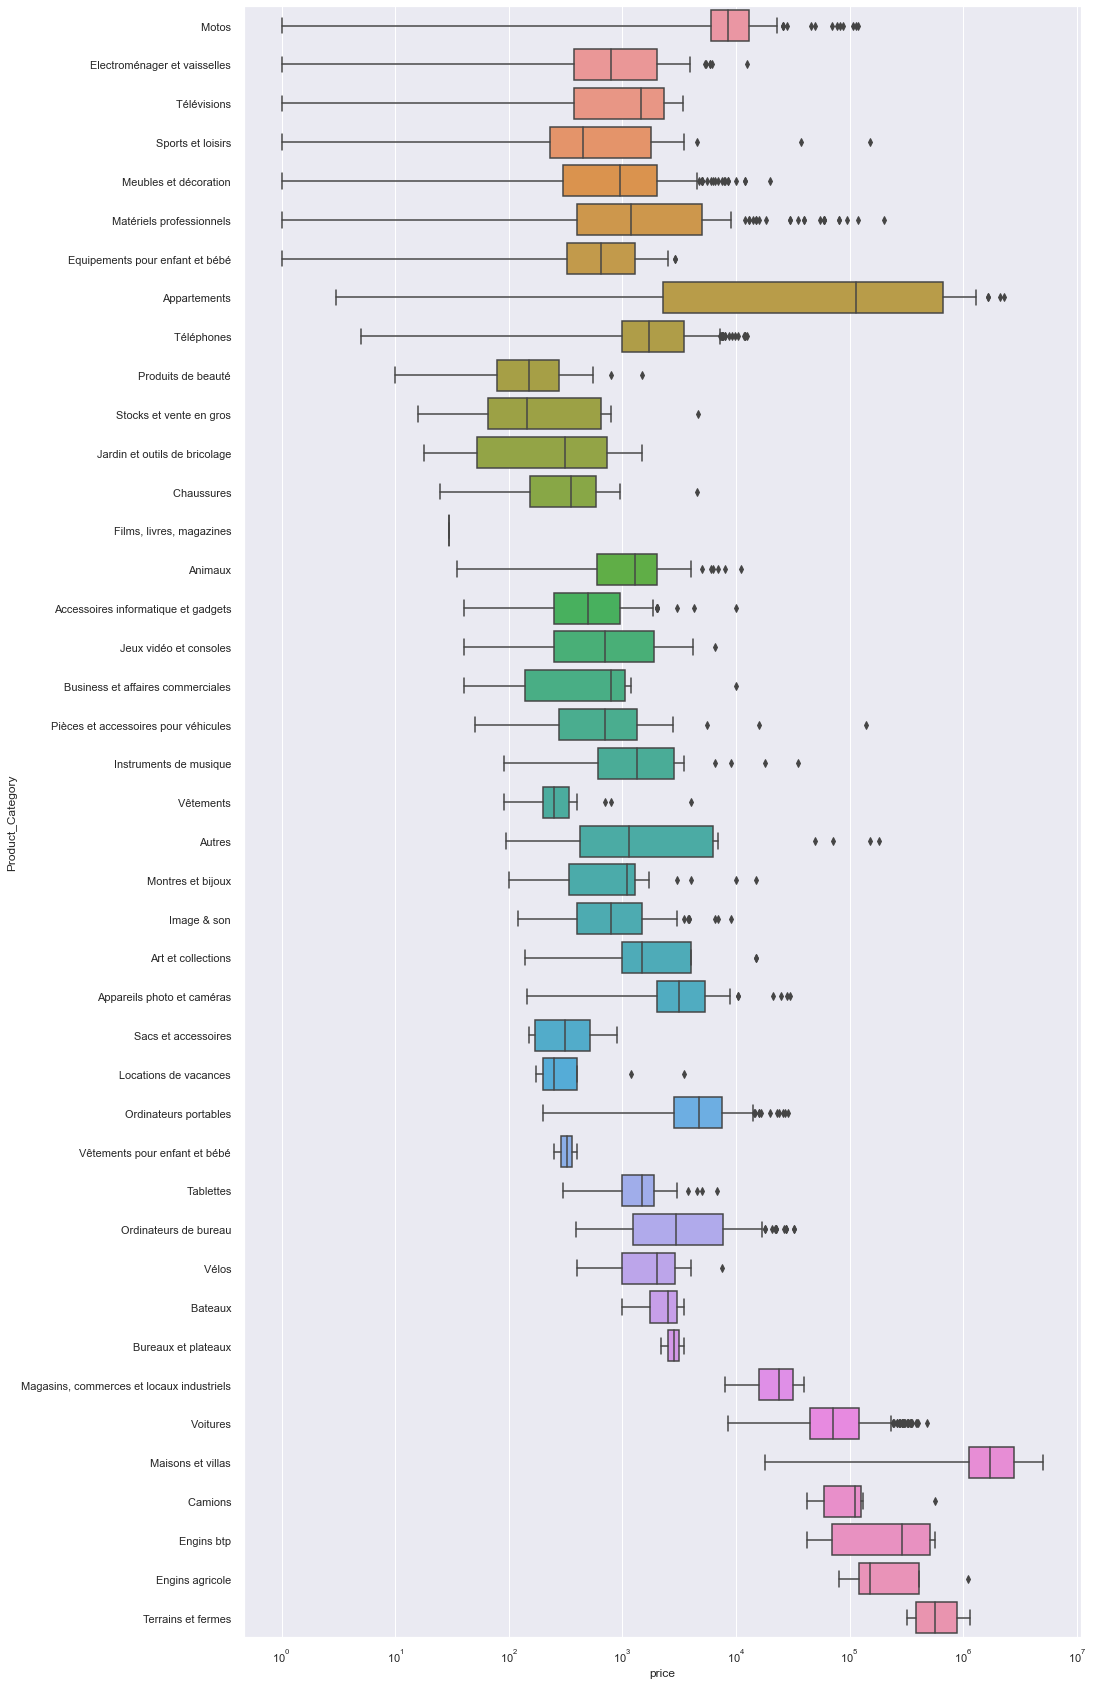

In [24]:
plt.figure(figsize=(15,30))
sns.boxplot(df['price'],df['Product_Category'])
plt.xscale('log')

Most of the products contain outliers because of more variation in cost price demand of the products.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


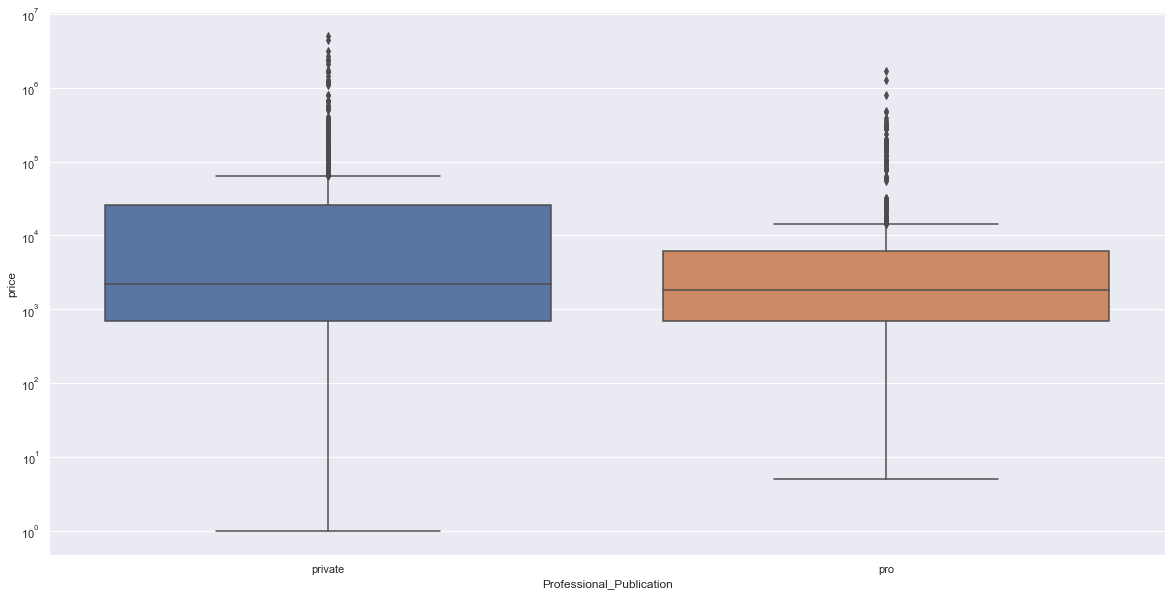

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(df['Professional_Publication'],df['price'])
plt.yscale('log')

Most costliest products sold are of private publications than pro publications. More number of outliers are present in private publications.

In [26]:
df['Professional_Publication'].value_counts()

private    1558
pro         943
Name: Professional_Publication, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Professional_Publication', ylabel='count'>

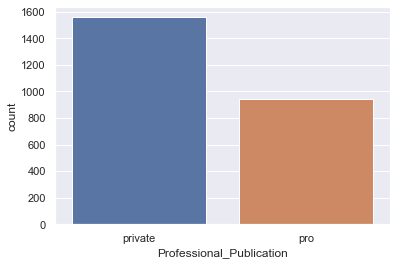

In [27]:
sns.countplot(df['Professional_Publication'])

More number of private publication products are sold than pro publication products.

In [28]:
df['Product_Category'].value_counts()

Voitures                                      378
Téléphones                                    290
Ordinateurs de bureau                         249
Ordinateurs portables                         216
Meubles et décoration                         190
Accessoires informatique et gadgets           139
Matériels professionnels                      129
Motos                                          97
Jeux vidéo et consoles                         81
Electroménager et vaisselles                   71
Animaux                                        61
Image & son                                    61
Montres et bijoux                              59
Appareils photo et caméras                     46
Appartements                                   44
Equipements pour enfant et bébé                35
Pièces et accessoires pour véhicules           35
Tablettes                                      29
Vélos                                          29
Produits de beauté                             27


<AxesSubplot:xlabel='count', ylabel='Product_Category'>

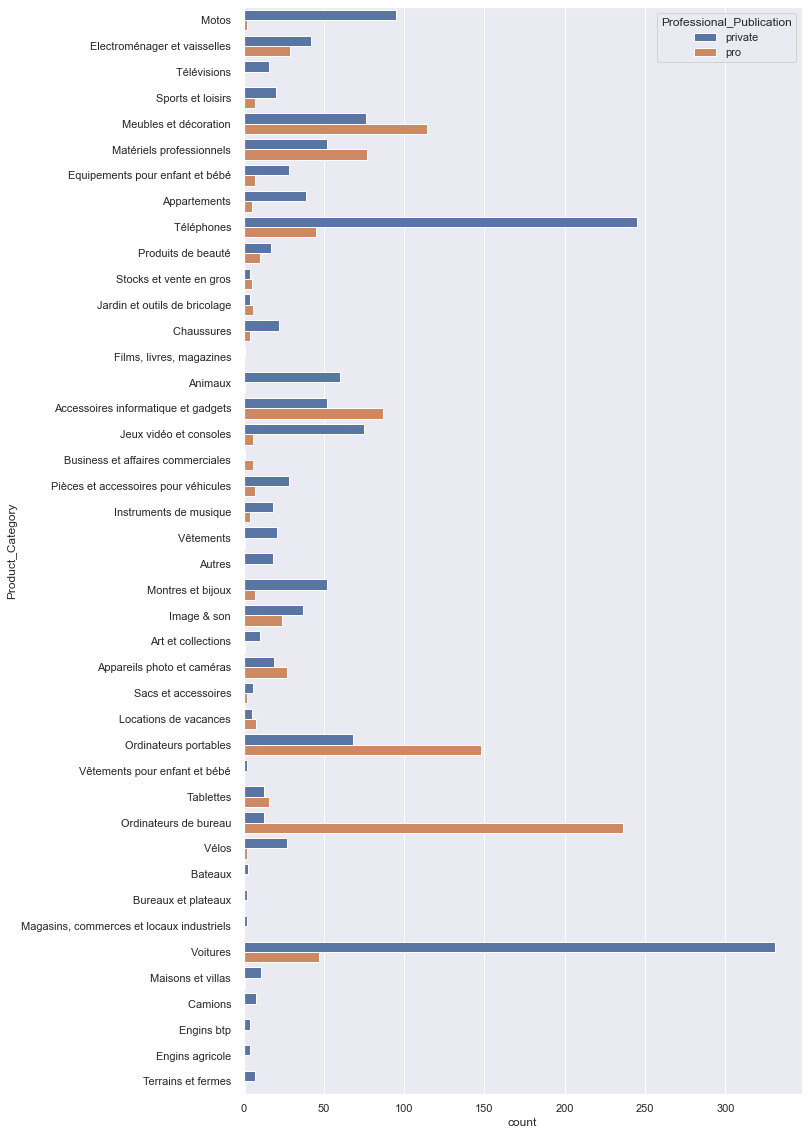

In [29]:
plt.figure(figsize=(10,20))
sns.countplot(y = df['Product_Category'],hue = df['Professional_Publication'])

Voitures category of product of private publications are more sold and Ordinateurs de bureau category of pro publication products are more sold. Overall, Voitures category products are sold the most. Films, livres, magazines category of products are sold the least.

In [30]:
df['Region_address'].value_counts()

Grand Casablanca                    793
Rabat-Salé-Zemmour-Zaër             394
Tanger-Tétouan                      315
Marrakech-Tensift-Al Haouz          220
Souss-Massa-Drâa                    160
Fès-Boulemane                       153
Meknès-Tafilalet                    122
Oriental                             87
Gharb-Chrarda-Beni Hssen             85
DoukkalaAbda                        67
Chaouia-Ouardigha                    40
Tadla-Azilal                         25
Taza-Al Hoceima-Taounate             22
Guelmim-Es Semara                     8
Oued Ed-Dahab-Lagouira                6
Laâyoune-Boujdour-Sakia El Hamra      4
Name: Region_address, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Region_address'>

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


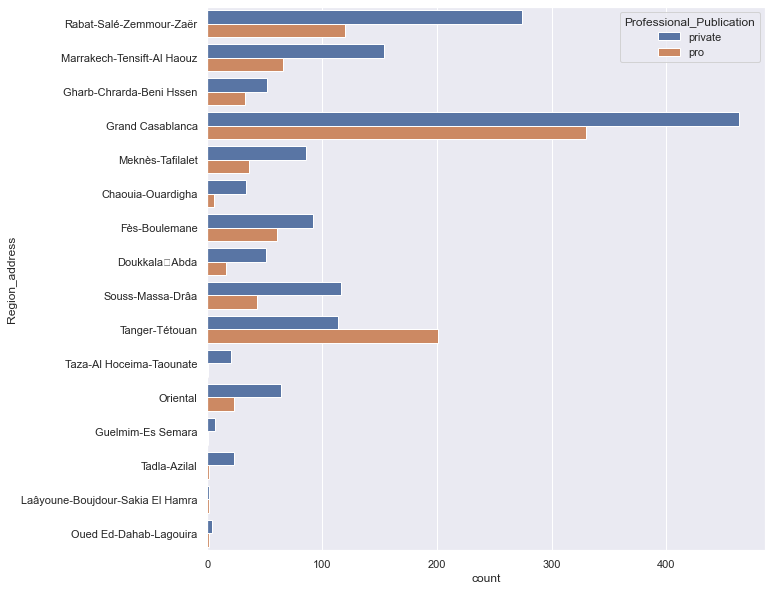

In [31]:
plt.figure(figsize=(10,10))
sns.countplot(y = df['Region_address'],hue = df['Professional_Publication'])

In the above plot we can clearly say that Grand Casablanca is the address where most private and pro publications are there while Laâyoune-Boujdour-Sakia El Hamra has the least.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

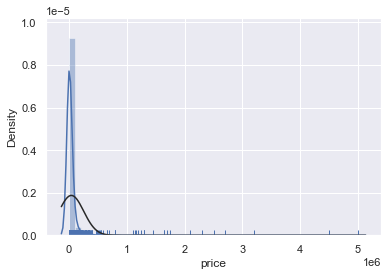

In [32]:
sns.distplot(df['price'],kde=True,fit=norm,rug=True)

In [33]:
print('Minimum Price:',df.price.min())
print('Maximum Price:',df.price.max())

Minimum Price: 1
Maximum Price: 5000000


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

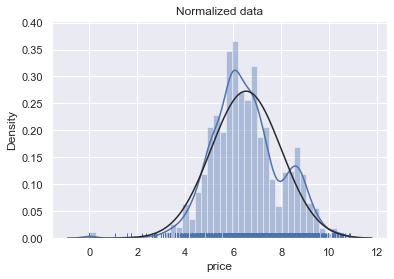

In [34]:
i = df.price>0
Original = df.price.loc[i]
Normalized = pd.Series(stats.boxcox(Original)[0],name='price',index=Original.index)

sns.distplot(Normalized,rug=True,fit=norm)
plt.title('Normalized data')

The dataset of prices are a little bit of right skewed normalised.

<AxesSubplot:xlabel='count', ylabel='price'>

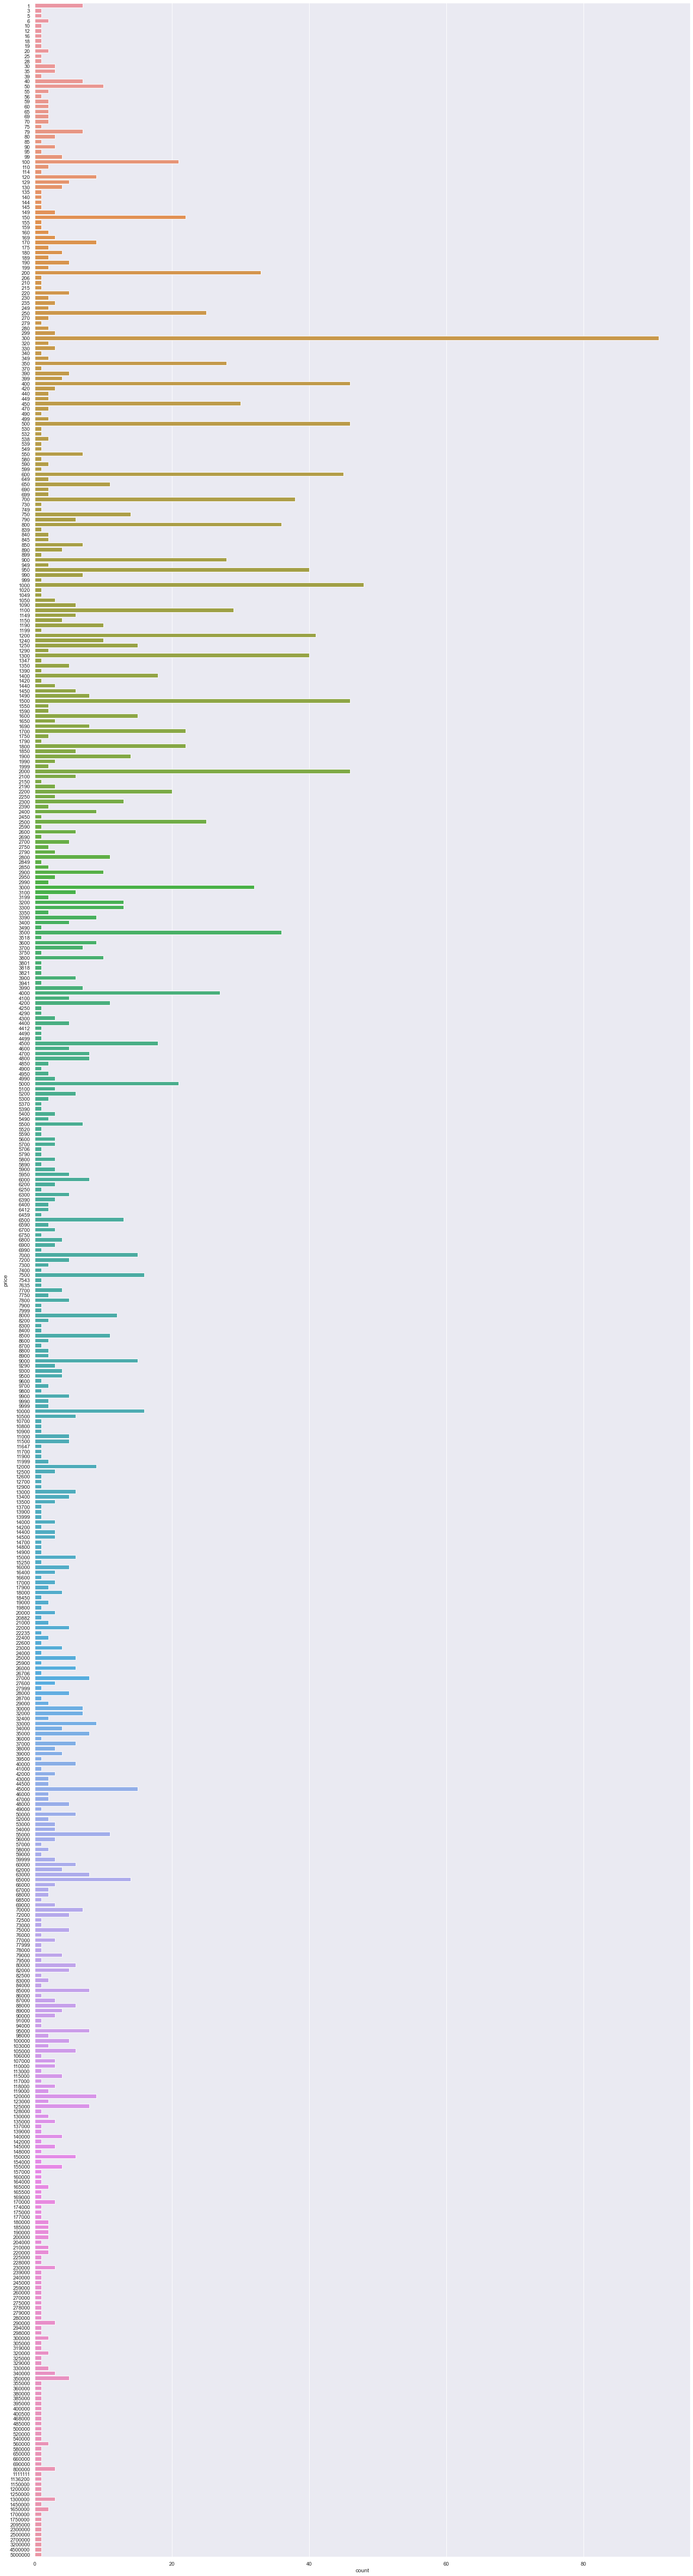

In [35]:
plt.figure(figsize=(25,100))
sns.countplot(y=df['price'])

High demand of product having cost price=300 and most of the products sold are of prices in the range 100 to 10000. Less demand of products with high price.

<AxesSubplot:xlabel='count', ylabel='Local_address'>

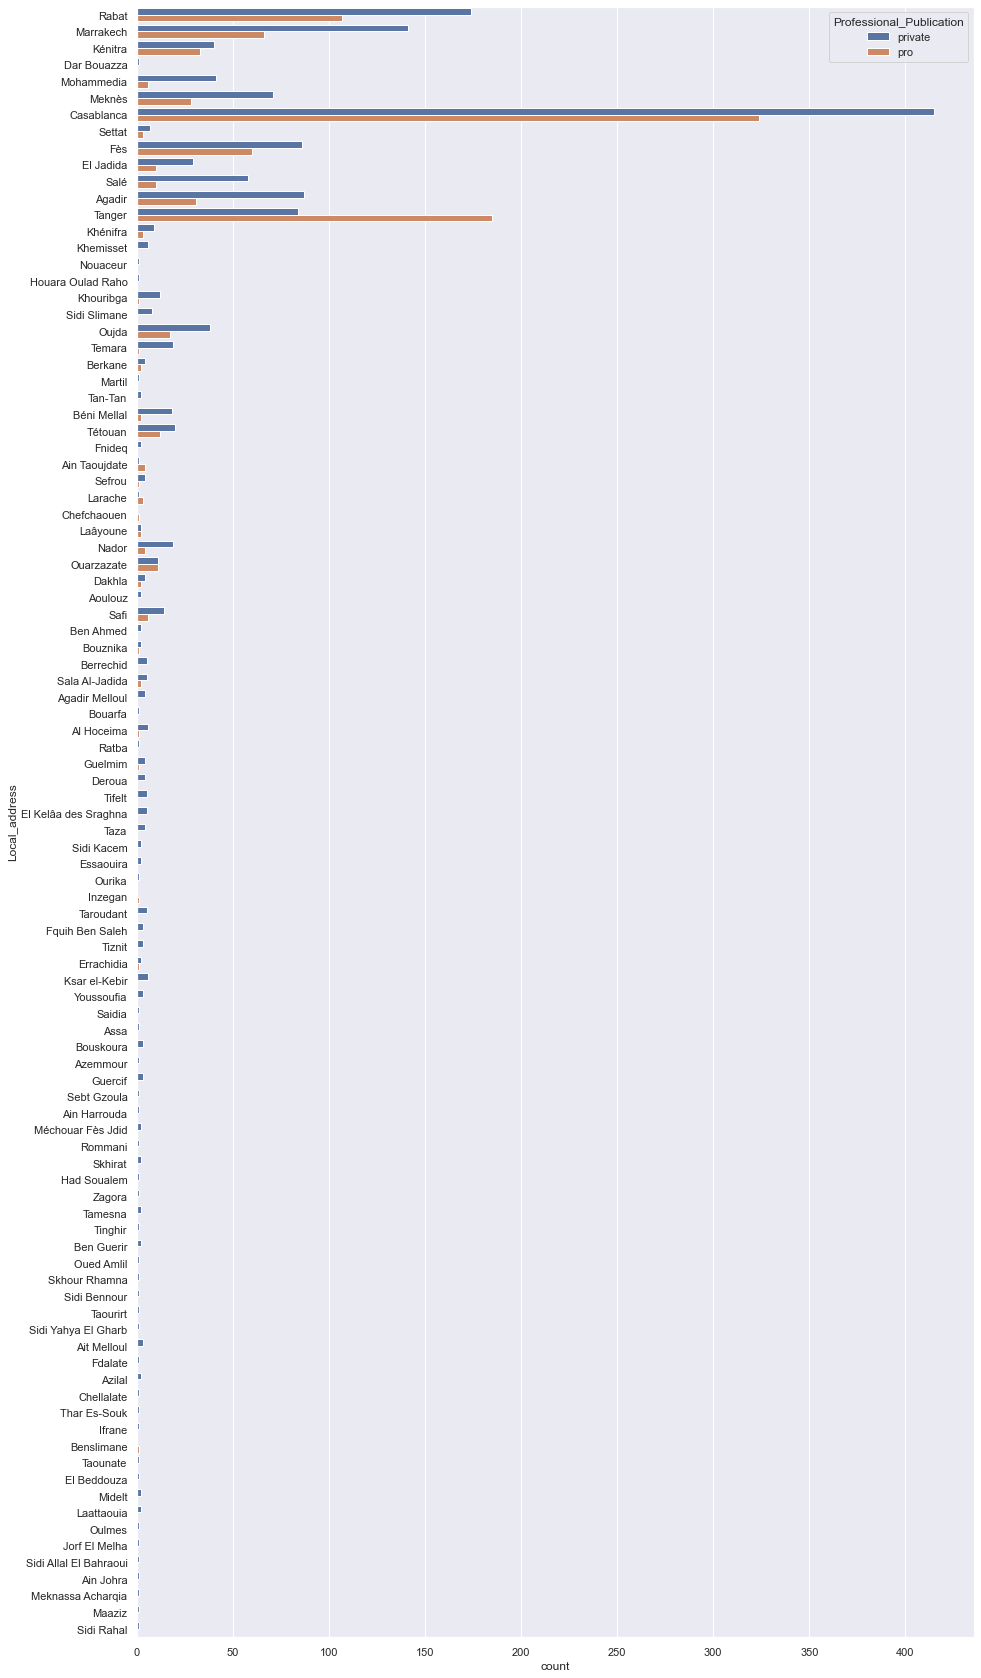

In [36]:
plt.figure(figsize=(15,30))
sns.countplot(y=df['Local_address'],hue=df['Professional_Publication'])

<AxesSubplot:xlabel='price', ylabel='Region_address'>

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


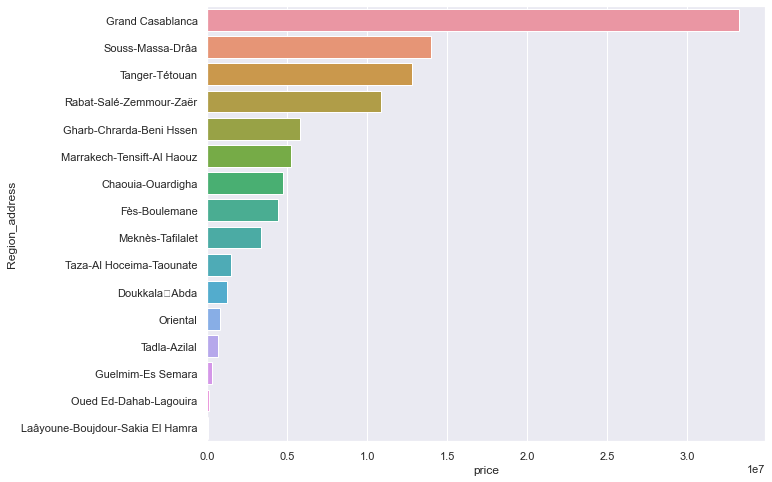

In [37]:
plt.figure(figsize=(10,8))
sns.barplot(data=df.groupby(['Region_address'])['price'].sum().reset_index().sort_values(by=['price'], ascending=False),x='price',y='Region_address')

Both the pro and private products are most sold by sellers in Grand Casablanca. Even the most costliest product are sold by sellers in Grand Casablanca. Least number of products are sold by sellers of Laâyoune-Boujdour-Sakia El Hamra region.